In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_table("boston.csv", sep='\s+')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


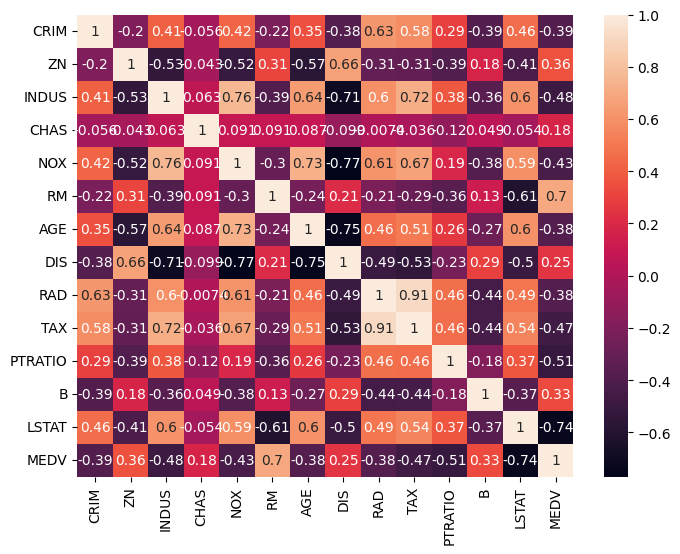

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [8]:
df.drop('RAD', axis=1, inplace=True)

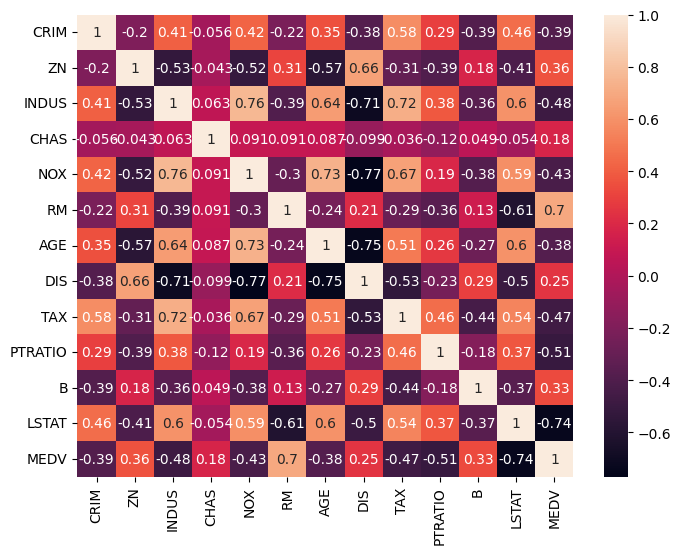

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [10]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [12]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [13]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12)

In [15]:
(
    X_train.shape,
    X_test.shape
)

((379, 12), (127, 12))

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

4.72046980530143

In [17]:
y_pred

array([21.15662462, 17.63557425,  7.85216995, 30.14660492, 31.20604355,
       21.61725956, 20.75201133, 37.39991539, 31.33291   , 25.96540551,
       25.41567901, 21.60540248, 21.68388864, 22.28942087, 32.14047862,
       44.01320173, 20.27007377, 29.87933089, 23.23118355, 26.31385517,
       33.18357371, 14.48119694, 22.17723908, 13.02208486, 26.29540033,
       18.9309627 , 21.52415138, 13.96774867, 25.99226518, 36.87363926,
       27.2360197 , 27.70725827, 16.33350292, 31.50470534, 41.74684622,
       17.36459518, 21.22263141, 39.4695355 , 14.74740849, 25.22369388,
       17.36948502, 24.0488694 , 21.23973014, 33.86410736, 18.16183101,
       19.15880663, 21.13230605, 14.16686624, 37.36983773, 23.0725844 ,
       26.1963037 , 21.08826495, 15.686783  , 24.91879975, 17.61096107,
       19.32018074, 23.80809716, 19.54492911, 19.45698406, 19.74096608,
       19.4508784 , 30.98058399, 21.32475231, 18.377825  , 18.72946433,
       25.65524388, 26.41629472, 12.70664399, 23.68588293, 38.81

In [18]:
y_test

334    20.7
394    12.7
404     8.5
236    25.1
307    28.2
       ... 
272    24.4
228    46.7
234    29.0
351    24.1
62     22.2
Name: MEDV, Length: 127, dtype: float64

In [19]:
pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})

,y_test,y_pred
334,20.7,21.156625
394,12.7,17.635574
404,8.5,7.852170
236,25.1,30.146605
307,28.2,31.206044
...,...,...
272,24.4,27.925580
228,46.7,33.557771
234,29.0,31.605233
351,24.1,23.154785
